CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed( 0 )

In [164]:
train = pd.read_csv('a4-train.csv', index_col=0)
test = pd.read_csv('a4-test.csv', index_col=0)

In [165]:
set(train.dtypes)

{dtype('int64')}

Task 1: Perform exploratory data analysis (15 points)

In [166]:
train

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,485,423,504,493,521,466,494,479,482,471,...,478,479,567,547,498,484,474,567,538,0
1,483,499,520,467,495,484,485,477,488,491,...,481,484,451,445,443,481,485,492,477,1
2,487,486,495,481,421,481,499,478,489,482,...,477,511,245,522,480,483,493,421,488,1
3,480,427,531,458,544,492,489,477,478,482,...,483,471,313,490,414,480,516,495,469,0
4,491,472,430,463,431,480,459,477,481,479,...,479,493,435,444,455,482,468,497,435,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,483,452,477,467,493,481,445,476,486,477,...,481,475,539,526,521,477,471,503,531,1
1996,494,562,451,484,575,479,444,477,488,476,...,478,469,453,460,524,480,474,495,527,1
1997,496,494,475,497,483,487,466,477,488,487,...,475,545,298,514,529,487,504,517,531,0
1998,483,495,472,480,523,474,500,477,472,486,...,482,481,698,490,516,475,494,540,506,0


In [167]:
a=train.corr()
# a['labels']
a['labels']

feat_0      0.002414
feat_1      0.019003
feat_2      0.011906
feat_3     -0.002153
feat_4      0.042497
              ...   
feat_496   -0.053324
feat_497    0.036145
feat_498    0.002203
feat_499    0.001549
labels      1.000000
Name: labels, Length: 501, dtype: float64

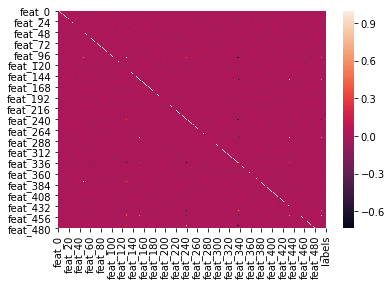

In [168]:
sns.heatmap(a)

In [169]:
b=a.iloc[-1:]
b=b.drop(columns=['labels'],axis=1)


# for i in b:
#     print(b[i])
    
    
b=b[b>.1]
# np.amax(b,axis=1)

b.dropna(axis=1)

,feat_48,feat_105,feat_128,feat_241,feat_378,feat_475
labels,0.118477,0.126263,0.126758,0.217827,0.115962,0.219933


In [170]:
X_train_6=train[['feat_48', 'feat_105', 'feat_128', 'feat_241', 'feat_378', 'feat_475']]
X_train_6
X_test_6=test[['feat_48', 'feat_105', 'feat_128', 'feat_241', 'feat_378', 'feat_475']]
X_test_6

,feat_48,feat_105,feat_128,feat_241,feat_378,feat_475
0,513,506,479,446,525,411
1,519,366,469,432,535,402
2,507,529,481,452,522,399
3,437,181,455,457,431,430
4,518,427,473,455,538,419
...,...,...,...,...,...,...
595,504,333,463,479,513,457
596,532,583,488,449,576,411
597,451,496,478,505,455,487
598,511,630,489,469,536,445


In [171]:
X_train_feat_475=train['feat_475']
X_test_feat_475=test['feat_475']
X_test_feat_475

0      411
1      402
2      399
3      430
4      419
      ... 
595    457
596    411
597    487
598    445
599    366
Name: feat_475, Length: 600, dtype: int64

In [172]:
test

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
0,486,497,494,477,582,478,535,477,496,480,...,485,473,576,521,493,481,485,490,478,0
1,496,524,490,485,438,488,503,476,474,491,...,474,519,441,453,488,488,503,543,547,0
2,486,465,481,467,529,484,464,476,508,474,...,482,454,712,425,518,479,466,494,470,1
3,479,485,502,489,487,478,402,477,500,473,...,470,491,381,532,469,488,487,539,546,1
4,482,485,551,475,443,475,456,475,494,471,...,484,479,574,509,509,473,483,545,490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,489,447,499,464,470,488,446,477,475,479,...,476,474,351,456,530,491,500,510,476,0
596,480,455,580,487,484,488,523,477,495,487,...,478,497,712,505,545,480,486,529,504,1
597,472,506,525,490,537,475,463,474,478,497,...,492,480,521,532,541,470,490,552,491,0
598,492,475,577,493,457,486,466,476,532,473,...,481,527,534,521,456,475,482,514,480,0


In [173]:
X_train=train.drop(columns=['labels'],axis=1)
# y_train=pd.DataFrame(train,columns=['labels'])
y_train=train['labels']

X_test=test.drop(columns=['labels'],axis=1)
# y_test=pd.DataFrame(test,columns=['labels'])
y_test=test['labels']

In [174]:
X_train.shape

(2000, 500)

In [175]:
# y_train.groupby('labels').size()
y_train.value_counts()

1    1000
0    1000
Name: labels, dtype: int64

In [176]:
duplicate_rows_df = X_train[X_train.duplicated()]
duplicate_rows_df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499


In [177]:
set(X_train.count())

{2000}

In [178]:
############ Checking NULL values in training set for feature engineering ################
set(X_train.isnull().sum())

{0}

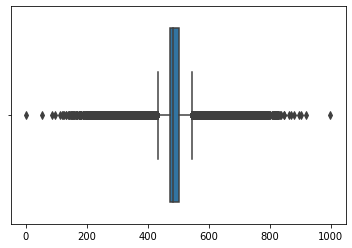

In [179]:
############ Checking Distrubution to detect outliers ####################
import seaborn as sns
sns.boxplot(x=X_train)

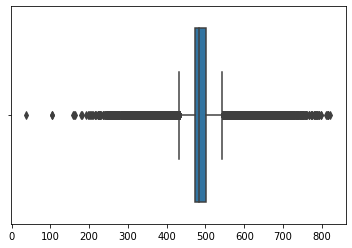

In [180]:
sns.boxplot(x=X_test)

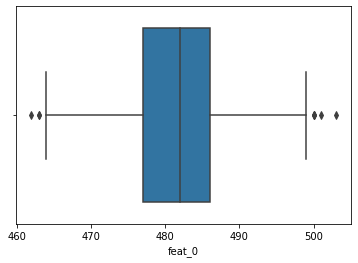

In [181]:
sns.boxplot(x=X_train['feat_0'])

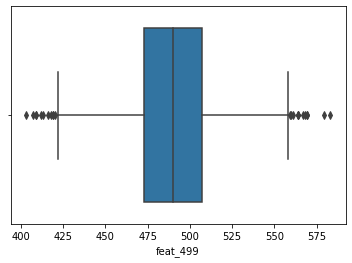

In [182]:
sns.boxplot(x=X_train['feat_499'])

In [183]:
#################### Checking mean of each column to check the relation with each other #####################
train.mean().unique()

array([4.817225e+02, 4.834525e+02, 5.101660e+02, 4.833845e+02,
       5.016125e+02, 4.792590e+02, 4.801095e+02, 4.765650e+02,
       4.867935e+02, 4.787890e+02, 4.865175e+02, 4.906535e+02,
       4.781645e+02, 4.815245e+02, 4.850385e+02, 4.794235e+02,
       4.792870e+02, 4.949475e+02, 4.841730e+02, 4.774270e+02,
       4.847145e+02, 4.942390e+02, 4.765730e+02, 4.792605e+02,
       4.994075e+02, 5.047190e+02, 4.847835e+02, 4.820995e+02,
       4.805975e+02, 4.919145e+02, 4.819315e+02, 5.000370e+02,
       5.006095e+02, 4.895455e+02, 4.867130e+02, 4.891280e+02,
       4.790460e+02, 4.806700e+02, 4.798000e+02, 4.761530e+02,
       4.764925e+02, 4.894840e+02, 4.765660e+02, 4.878925e+02,
       5.003040e+02, 4.804390e+02, 4.966275e+02, 4.947715e+02,
       4.850005e+02, 4.795405e+02, 5.178530e+02, 5.057520e+02,
       4.853560e+02, 4.800735e+02, 4.971905e+02, 4.951990e+02,
       4.796940e+02, 4.848665e+02, 5.093415e+02, 4.779580e+02,
       4.878915e+02, 4.814940e+02, 4.940460e+02, 4.7884

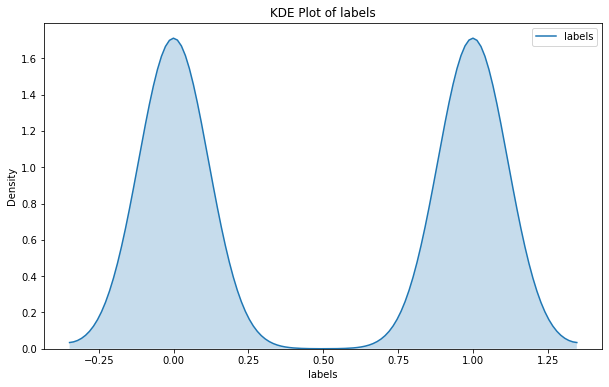

In [184]:
########## Kernel Density Estimation of Y variable ##################
plt.figure(figsize=(10,6))
sns.kdeplot(train['labels'], shade=True)
plt.title("KDE Plot of labels")
plt.xlabel("labels")
plt.ylabel("Density")
plt.show()

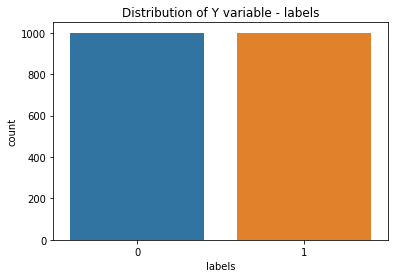

In [185]:
############### Checking the distribution of output variables ################

sns.countplot(train['labels'])
plt.xticks(rotation=0)
plt.title("Distribution of Y variable - labels")
plt.show()

In [186]:
# sns.catplot(x='feat_475', y='labels', kind="box", data=train, height=8.27, aspect=14.5/8.27)
# plt.xticks(rotation=90)
# plt.show()

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [187]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [188]:
############ Baseline Logistic Regression with original features ######################
l=[0.1,0.5,1,2,5,10,15]
logreg=LogisticRegressionCV(Cs=l,cv=5,solver='saga',max_iter=10000,n_jobs=-1,penalty='l2')
logreg.fit(X_train,y_train)

LogisticRegressionCV(Cs=[0.1, 0.5, 1, 2, 5, 10, 15], class_weight=None, cv=5,
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=10000, multi_class='warn',
                     n_jobs=-1, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='saga', tol=0.0001, verbose=0)

In [189]:
############ Accuracy with a basic logistic regression model and original dataset ##################
y_pred=logreg.predict(X_test)
score=accuracy_score(y_test, y_pred, normalize=True)
score


0.5816666666666667

In [276]:
print('Logistic Regression Baseline Score with Original Dataset',score)

Logistic Regression Baseline Score with Original Dataset 0.5916666666666667


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been convered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

### Answer 3 ###

In this assignment, I tried with various feature selection and feature engineering methods.

To visualize this data, a correlation matrix with heatmap is generated on the original dataset. It reveals a similar correlation among the 500 feature columns and the Y column (labels). Almost all the features have the correlation between 0 and 0.1, so, it was not of much help. Moreover, only 6 columns namely, feat_48 feat_105 feat_128 feat_241 feat_378 feat_475, have correlation greater than 0.1.

The baseline model with Logistic Regression when trained and tested with Original features yielded around 58% accuracy.
Based on various feature selection and feature engineering methods, I have modified the X_train and X_test in 3 ways. These are:

For feature selection:

1.	1.	Selecting top 6 features based on the highest correlation. Removing outliers, i.e., filtering out the top 10 percentile and the bottom 10 percentile.

2.	Variance Threshold and Univariate Feature Selection.
Variance Threshold is a type of unsupervised feature selection because it does not require the Y variable (output) to perform the selection. It calculates the variance, and removes those columns which have variance less then the threshold value. The closer the value of each datapoint to each other in a particular column, the lesser will be the variance.
Univariate feature selection with chi2 and F-test for feature scoring. The method used is SelectPercentile.

3.	Principal Component Analysis
This is also an unsupervised method for preserving the top ‘n’ components. It looks for trends in the data and tries to map them on Principal axes.


In [190]:
############ Feature Selection: Starts ######################
############ Variance Threshold: Starts ######################

In [191]:
from sklearn.feature_selection import VarianceThreshold

In [192]:
selector_vt = VarianceThreshold(threshold=1)

X_train_vt=selector_vt.fit_transform(X_train,y_train)

In [193]:
############ Conversion from numpy to pandas with column names ################
X_train_vt=X_train[X_train.columns[selector_vt.get_support(indices=True)]]

In [194]:
X_train_vt

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,485,423,504,493,521,466,494,479,482,471,...,470,478,479,567,547,498,484,474,567,538
1,483,499,520,467,495,484,485,477,488,491,...,445,481,484,451,445,443,481,485,492,477
2,487,486,495,481,421,481,499,478,489,482,...,486,477,511,245,522,480,483,493,421,488
3,480,427,531,458,544,492,489,477,478,482,...,505,483,471,313,490,414,480,516,495,469
4,491,472,430,463,431,480,459,477,481,479,...,486,479,493,435,444,455,482,468,497,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,483,452,477,467,493,481,445,476,486,477,...,497,481,475,539,526,521,477,471,503,531
1996,494,562,451,484,575,479,444,477,488,476,...,477,478,469,453,460,524,480,474,495,527
1997,496,494,475,497,483,487,466,477,488,487,...,499,475,545,298,514,529,487,504,517,531
1998,483,495,472,480,523,474,500,477,472,486,...,480,482,481,698,490,516,475,494,540,506


In [195]:
X_train_vt.shape

(2000, 494)

In [196]:
############ Columns having almost all the vales same , i.e. low variance. Threshold=1 #########
X_train[X_train.columns.difference(X_train_vt.columns)]

,feat_228,feat_276,feat_332,feat_404,feat_423,feat_90
0,477,477,477,476,476,476
1,476,476,477,478,476,476
2,476,477,475,476,477,476
3,476,475,475,476,476,476
4,478,477,478,477,477,476
...,...,...,...,...,...,...
1995,476,475,476,475,476,475
1996,476,477,476,477,476,476
1997,477,476,475,477,476,476
1998,476,477,476,477,475,475


In [197]:
X_train['feat_90'].unique()

array([476, 477, 475, 474, 478], dtype=int64)

In [198]:
mask_vt=selector_vt.get_support()
# mask_vt

In [199]:
X_test_vt = selector_vt.transform(X_test)
X_test_vt=X_test[X_test.columns[selector_vt.get_support(indices=True)]]
X_test_vt

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_490,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499
0,486,497,494,477,582,478,535,477,496,480,...,486,485,473,576,521,493,481,485,490,478
1,496,524,490,485,438,488,503,476,474,491,...,467,474,519,441,453,488,488,503,543,547
2,486,465,481,467,529,484,464,476,508,474,...,463,482,454,712,425,518,479,466,494,470
3,479,485,502,489,487,478,402,477,500,473,...,495,470,491,381,532,469,488,487,539,546
4,482,485,551,475,443,475,456,475,494,471,...,458,484,479,574,509,509,473,483,545,490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,489,447,499,464,470,488,446,477,475,479,...,480,476,474,351,456,530,491,500,510,476
596,480,455,580,487,484,488,523,477,495,487,...,487,478,497,712,505,545,480,486,529,504
597,472,506,525,490,537,475,463,474,478,497,...,507,492,480,521,532,541,470,490,552,491
598,492,475,577,493,457,486,466,476,532,473,...,495,481,527,534,521,456,475,482,514,480


In [200]:
############ Variance Threshold: Ends ######################
############ SelectPercentile: Starts ######################
from sklearn.feature_selection import SelectPercentile, chi2, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

In [201]:

selector_sp = SelectPercentile(chi2, percentile=50)
X_train_sp=selector_sp.fit_transform(X_train_vt,y_train)
X_train_sp
############ Conversion from numpy to pandas with column names ################
X_train_sp=X_train_vt[X_train_vt.columns[selector_sp.get_support(indices=True)]]
X_train_sp

,feat_1,feat_2,feat_4,feat_6,feat_10,feat_12,feat_13,feat_15,feat_18,feat_24,...,feat_475,feat_478,feat_480,feat_481,feat_483,feat_490,feat_493,feat_494,feat_496,feat_497
0,423,504,521,494,551,472,461,492,468,474,...,413,538,505,498,546,470,567,547,484,474
1,499,520,495,485,510,443,506,483,506,505,...,447,479,525,481,491,445,451,445,481,485
2,486,495,421,499,492,480,435,475,481,516,...,583,543,495,516,485,486,245,522,483,493
3,427,531,544,489,520,467,609,445,497,452,...,540,442,493,529,509,505,313,490,480,516
4,472,430,431,459,468,500,492,501,500,587,...,407,526,474,517,489,486,435,444,482,468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,452,477,493,445,502,459,525,538,474,516,...,537,423,506,493,453,497,539,526,477,471
1996,562,451,575,444,410,472,508,496,482,579,...,553,469,515,479,526,477,453,460,480,474
1997,494,475,483,466,523,495,475,468,499,523,...,419,477,468,455,530,499,298,514,487,504
1998,495,472,523,500,461,461,524,489,465,453,...,345,520,481,459,476,480,698,490,475,494


In [202]:
X_test_sp = selector_sp.transform(X_test_vt)
X_test_sp
############ Conversion from numpy to pandas with column names ################
X_test_sp=X_test_vt[X_test_vt.columns[selector_sp.get_support(indices=True)]]
X_test_sp.columns
############ SelectPercentile: Ends ######################

Index(['feat_1', 'feat_2', 'feat_4', 'feat_6', 'feat_10', 'feat_12', 'feat_13',
       'feat_15', 'feat_18', 'feat_24',
       ...
       'feat_475', 'feat_478', 'feat_480', 'feat_481', 'feat_483', 'feat_490',
       'feat_493', 'feat_494', 'feat_496', 'feat_497'],
      dtype='object', length=247)

In [203]:
########### Principal Component Analysis: Starts ########
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca=pca.fit_transform(X_train,y_train)




In [204]:
X_train_pca = pd.DataFrame(X_train_pca, index=X_train.index)
X_train_pca

,0,1,2,3,4
0,-85.125400,-1.240465,240.718773,183.488654,-60.980949
1,116.942364,6.500155,85.872978,129.459279,-1.570257
2,269.300835,-370.351718,-87.756376,79.269489,10.170499
3,279.394071,-130.203705,-17.047199,10.433101,75.789132
4,339.677546,202.447430,124.993133,-64.221652,-29.443732
...,...,...,...,...,...
1995,-238.723490,-235.162179,144.182931,118.620876,-6.730058
1996,39.972177,-38.982768,-62.357344,8.749281,165.627520
1997,417.319556,-27.206805,44.241790,91.509869,-117.212805
1998,-75.915514,445.928777,98.865961,-22.747395,23.355410


In [205]:
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index)
X_test_pca

,0,1,2,3,4
0,-75.025825,209.133601,-143.657044,80.789613,-19.886250
1,295.770895,184.210573,115.947895,128.805079,19.352557
2,-210.337217,258.167635,98.471941,-2.525986,11.334996
3,426.886025,183.141150,85.452613,-95.727473,6.153932
4,-8.205218,252.506653,-139.459739,22.431803,50.910184
...,...,...,...,...,...
595,344.991101,78.041131,-25.302492,50.385917,53.694892
596,-294.782818,263.555666,25.381797,44.758256,34.921477
597,-6.383282,-17.021744,215.498391,-73.479048,-24.858547
598,-80.111901,-8.772096,52.478792,133.077068,-39.077116


In [206]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 5,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [207]:
########### Principal Component Analysis: Ends ########

In [208]:
########### Feature Engineering: Starts ########

In [209]:
X_train_fe=train.drop(columns=['labels'],axis=1)
X_test_fe=test.drop(columns=['labels'],axis=1)

In [210]:
for i in X_train_fe.columns:
    upper_lim = X_train_fe[i].quantile(.90)
    lower_lim = X_train_fe[i].quantile(.10)
    X_train_fe.loc[(X_train_fe[i] > upper_lim),i] = upper_lim
    X_train_fe.loc[(X_train_fe[i] < lower_lim),i] = lower_lim

In [211]:
for i in X_test_fe.columns:
    upper_lim = X_test_fe[i].quantile(.90)
    lower_lim = X_test_fe[i].quantile(.10)
    X_test_fe.loc[(X_test_fe[i] > upper_lim),i] = upper_lim
    X_test_fe.loc[(X_test_fe[i] < lower_lim),i] = lower_lim

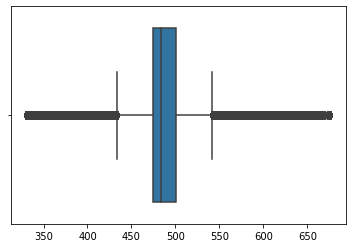

In [212]:
sns.boxplot(x=X_train_fe)

In [213]:
################ Logistic Regression with feature selection ################
l=[0.1,0.5,1,2,5,10,15]
logreg=LogisticRegressionCV(Cs=l,cv=5,solver='saga',max_iter=10000,n_jobs=-1,penalty='l2')
logreg.fit(X_train_sp,y_train)
y_pred_sel=logreg.predict(X_test_sp)
score_sel=accuracy_score(y_test, y_pred_sel, normalize=True)
score_sel

0.585

In [277]:
print('Logistic Regression with feature selection ',score_sel)

Logistic Regression with feature selection  0.585


In [214]:
################ Logistic Regression with PCA features ################
l=[0.1,0.5,1,2,5,10,15]
logreg=LogisticRegressionCV(Cs=l,cv=5,solver='saga',max_iter=10000,n_jobs=-1,penalty='l2')
logreg.fit(X_train_pca,y_train)
y_pred_pca=logreg.predict(X_test_pca)
score_pca=accuracy_score(y_test, y_pred_pca, normalize=True)
score_pca

0.5933333333333334

In [ ]:
print('Logistic Regression with PCA features ',score_pca)

In [215]:
################ Logistic Regression with feature engineering ################
l=[0.1,0.5,1,2,5,10,15]
logreg=LogisticRegressionCV(Cs=l,cv=5,solver='saga',max_iter=10000,n_jobs=-1,penalty='l2')
logreg.fit(X_train_sp,y_train)
y_pred_eng=logreg.predict(X_test_sp)
score_eng=accuracy_score(y_test, y_pred_eng, normalize=True)
score_eng

0.5866666666666667

In [ ]:
print('Logistic Regression with feature engineering ',score_eng)

In [216]:
l=[0.1,0.5,1,2,5,10,15]
logreg=LogisticRegressionCV(Cs=l,cv=5,solver='saga',max_iter=10000,n_jobs=-1,penalty='l2')
logreg.fit(X_train_6,y_train)
y_pred=logreg.predict(X_test_6)
score=accuracy_score(y_test, y_pred, normalize=True)
score

0.5916666666666667

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

In [217]:
############ Neural Network: Starts ######################
################## Original Features #####################
from sklearn.neural_network import MLPClassifier

nn_orig = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='logistic', hidden_layer_sizes=(512, 2),random_state=5)
nn_orig.fit(X_train, y_train)
y_pred_nn_orig = nn_orig.predict(X_test)
acc_nn_orig=accuracy_score(y_test, y_pred_nn_orig)
acc_nn_orig

0.6016666666666667

In [278]:
print('Neural Network Original Dataset ',acc_nn_orig)

Neural Network Original Dataset  0.6016666666666667


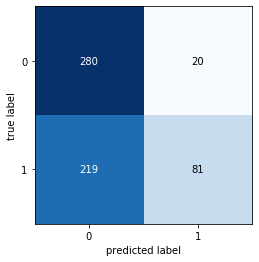

In [218]:
cf_nn_sel_orig=confusion_matrix(y_test, y_pred_nn_orig)
fig, ax = plot_confusion_matrix(conf_mat=cf_nn_sel_orig)

In [219]:
################## Selected Features #####################
nn_sel = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='logistic', hidden_layer_sizes=(512, 2),random_state=5)
nn_sel.fit(X_train_sp, y_train)
y_pred_nn_sel = nn_sel.predict(X_test_sp)
acc_nn_sel=accuracy_score(y_test, y_pred_nn_sel)
acc_nn_sel

0.6366666666666667

In [279]:
print('Neural Network with Selected Features ',acc_nn_sel)

Neural Network with Selected Features  0.6366666666666667


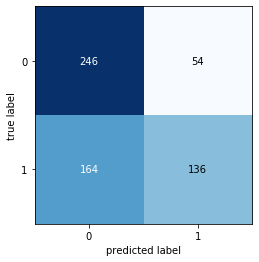

In [220]:
cf_nn_sel=confusion_matrix(y_test, y_pred_nn_sel)
fig, ax = plot_confusion_matrix(conf_mat=cf_nn_sel)

In [221]:
################## PCA Features #####################
nn_pca = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='tanh', hidden_layer_sizes=(128, 2),random_state=5)
nn_pca.fit(X_train_pca, y_train)
y_pred_nn_pca = nn_pca.predict(X_test_pca)
acc_nn_pca=accuracy_score(y_test, y_pred_nn_pca)
acc_nn_pca

0.7433333333333333

In [280]:
print('Neural Network with PCA features ',acc_nn_pca)

Neural Network with PCA features  0.7433333333333333


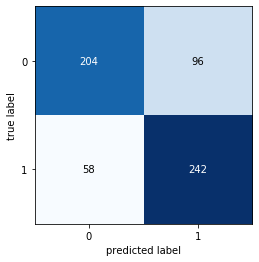

In [222]:
cf_nn_pca=confusion_matrix(y_test, y_pred_nn_pca)
fig, ax = plot_confusion_matrix(conf_mat=cf_nn_pca)

In [223]:
################## Engineered Features #####################
nn_eng = MLPClassifier(solver='lbfgs', alpha=1e-5,activation='tanh', hidden_layer_sizes=(64, 2),random_state=5)
nn_eng.fit(X_train_6, y_train)
y_pred_nn_eng = nn_eng.predict(X_test_6)
acc_nn_eng=accuracy_score(y_test, y_pred_nn_eng)
acc_nn_eng

0.5783333333333334

In [281]:
print('Neural Network with feature engineering ',acc_nn_eng)

Neural Network with feature engineering  0.5783333333333334


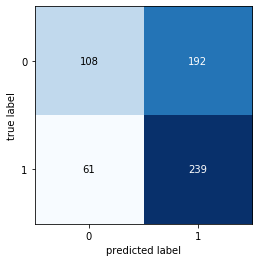

In [224]:
cf_nn_eng=confusion_matrix(y_test, y_pred_nn_eng)
fig, ax = plot_confusion_matrix(conf_mat=cf_nn_eng)
############ Neural Network: Ends ######################

In [283]:
############ Decision Tree: Starts ######################
from sklearn import tree
import graphviz
############ Original Features ######################
clf_orig = tree.DecisionTreeClassifier(max_depth=6,random_state=5)
clf_orig.fit(X_train, y_train)
y_pred_dt_orig = clf_orig.predict(X_test)
acc_dt_orig=accuracy_score(y_test, y_pred_dt_orig)
acc_dt_orig

0.805

In [284]:
print('Decision Tree with original dataset ',acc_dt_orig)

Decision Tree with original dataset  0.805


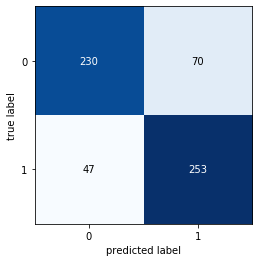

In [226]:
cf_dt_orig=confusion_matrix(y_test, y_pred_dt_orig)
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_orig)

In [227]:
columns=list(X_train.columns)
# tree.plot_tree(clf_orig,feature_names =columns)

In [286]:
############ Selected Features ######################
clf_sel = tree.DecisionTreeClassifier(max_depth=6,random_state=5)
clf_sel.fit(X_train_sp, y_train)
y_pred_dt_sel = clf_sel.predict(X_test_sp)

acc_dt_sel=accuracy_score(y_test, y_pred_dt_sel)
acc_dt_sel

0.7783333333333333

In [288]:
print('Decision Tree with feature selection ',acc_dt_sel)

Decision Tree with feature selection  0.7783333333333333


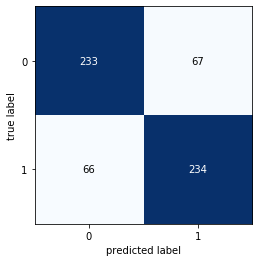

In [289]:
cf_dt_sel=confusion_matrix(y_test, y_pred_dt_sel)
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_sel)

In [230]:
# columns_1=list(X_train_pca.columns)

# tree.plot_tree(clf_sel,feature_names =columns_1)

In [231]:
############ PCA Features ######################
clf_pca = tree.DecisionTreeClassifier(max_depth=None,random_state=5)
clf_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = clf_pca.predict(X_test_pca)

acc_dt_pca=accuracy_score(y_test, y_pred_dt_pca)
acc_dt_pca

0.805

In [290]:
print('Decision Tree with PCA features ',acc_dt_pca)

Decision Tree with PCA features  0.805


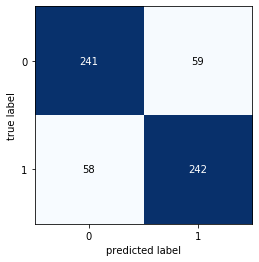

In [232]:
cf_dt_pca=confusion_matrix(y_test, y_pred_dt_pca)
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_pca)

In [233]:
############ Engineered Features ######################
clf_eng = tree.DecisionTreeClassifier(max_depth=6,random_state=5)
clf_eng.fit(X_train_fe, y_train)
y_pred_dt_eng = clf_eng.predict(X_test_fe)

acc_dt_eng=accuracy_score(y_test, y_pred_dt_eng)
acc_dt_eng

0.8

In [291]:
print('Decision Tree with feature engineering ',acc_dt_eng)

Decision Tree with feature engineering  0.8


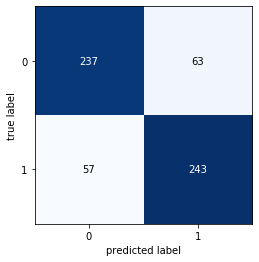

In [234]:
cf_dt_eng=confusion_matrix(y_test, y_pred_dt_eng)
fig, ax = plot_confusion_matrix(conf_mat=cf_dt_eng)

In [235]:
############ Decision Tree: Ends ######################
############ Random Forest : Starts ######################

In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [237]:
rf_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400],
#               'max_features':[2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':[2,3],
           'min_samples_split':[2,4]
              }


In [238]:
############ Original Features with Randomized Search  ######################
rf_orig=RandomForestClassifier()
random_search_orig = RandomizedSearchCV(rf_orig, param_distributions=rf_dist,
                                   n_iter=5, cv=5, iid=False)
random_search_orig.fit(X=X_train, y=y_train)
y_pred_rf_orig=random_search_orig.predict(X_test)
acc_rf_orig=accuracy_score(y_test, y_pred_rf_orig)
acc_rf_orig

0.7333333333333333

In [292]:
print('Random Forest with original dataset ',acc_rf_orig)

Random Forest with original dataset  0.7333333333333333


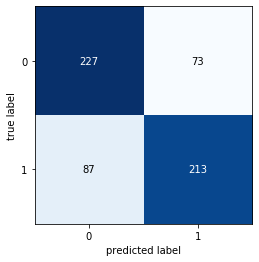

In [239]:
cf_rf_orig=confusion_matrix(y_test, y_pred_rf_orig)
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_orig)

In [240]:
############ Selected Features with Randomized Search  ######################
rf_sel=RandomForestClassifier()
random_search_sel = RandomizedSearchCV(rf_sel, param_distributions=rf_dist,
                                   n_iter=5, cv=5, iid=False,random_state=1)
random_search_sel.fit(X=X_train_sp, y=y_train)
y_pred_rf_sel=random_search_sel.predict(X_test_sp)
acc_rf_sel=accuracy_score(y_test, y_pred_rf_sel)
acc_rf_sel

0.7433333333333333

In [293]:
print('Random Forest with feature selection ',acc_rf_sel)

Random Forest with feature selection  0.7433333333333333


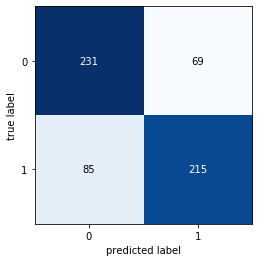

In [241]:
cf_rf_sel=confusion_matrix(y_test, y_pred_rf_sel)
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_sel)


In [242]:
############ PCA with Randomized Search  ######################
rf_pca=RandomForestClassifier()
random_search_pca = RandomizedSearchCV(rf_pca, param_distributions=rf_dist,
                                   n_iter=5, cv=5, iid=False,random_state=1)
random_search_pca.fit(X=X_train_pca, y=y_train)
y_pred_rf_pca=random_search_pca.predict(X_test_pca)
acc_rf_pca=accuracy_score(y_test, y_pred_rf_pca)
acc_rf_pca

0.8833333333333333

In [294]:
print('Random Forest with PCA features ',acc_rf_pca)

Random Forest with PCA features  0.8833333333333333


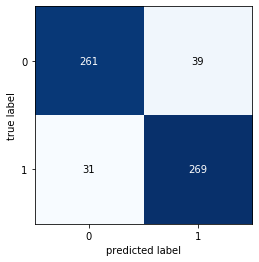

In [243]:
cf_rf_pca=confusion_matrix(y_test, y_pred_rf_pca)
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_pca)

In [244]:
############ Engineered Features with Randomized Search  ######################
rf_eng=RandomForestClassifier()
random_search_eng = RandomizedSearchCV(rf_eng, param_distributions=rf_dist,
                                   n_iter=5, cv=5, iid=False,random_state=0)
random_search_eng.fit(X=X_train_fe, y=y_train)
y_pred_rf_eng=random_search_eng.predict(X_test_fe)
acc_rf_eng=accuracy_score(y_test, y_pred_rf_eng)
acc_rf_eng

0.735

In [295]:
print('Random Forest with feature engineering ',acc_rf_eng)

Random Forest with feature engineering  0.735


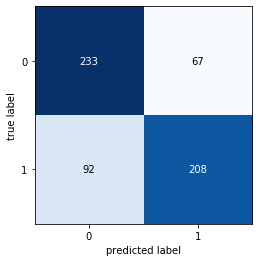

In [245]:
cf_rf_eng=confusion_matrix(y_test, y_pred_rf_eng)
fig, ax = plot_confusion_matrix(conf_mat=cf_rf_eng)

In [246]:
############ Random Forest : Ends ######################

In [247]:
############ SVC/SVM: Starts ######################
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [248]:
############## Original Features ################
svc_orig = SVC(kernel='poly',degree=6,gamma='scale')
svc_orig.fit(X=X_train, y=y_train)
y_pred_svc_orig=svc_orig.predict(X_test)
acc_svc_orig=accuracy_score(y_test, y_pred_svc_orig)
acc_svc_orig

0.6466666666666666

In [296]:
print('Support Vector Classifier with original dataset ',acc_svc_orig)

Support Vector Classifier with original dataset  0.6466666666666666


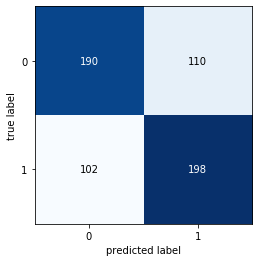

In [249]:
cf_svc_orig=confusion_matrix(y_test, y_pred_svc_orig)
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_orig)

In [250]:
############## Feature Selection ################
svc_sel = SVC(kernel='rbf',gamma='scale')
svc_sel.fit(X=X_train_sp, y=y_train)
y_pred_svc_sel=svc_sel.predict(X_test_sp)
acc_svc_sel=accuracy_score(y_test, y_pred_svc_sel)
acc_svc_sel

0.6966666666666667

In [297]:
print('Support Vector Classifier with feature selection ',acc_svc_sel)

Support Vector Classifier with feature selection  0.6966666666666667


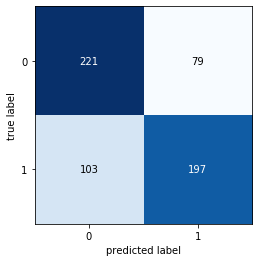

In [251]:
cf_svc_sel=confusion_matrix(y_test, y_pred_svc_sel)
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_sel)

In [252]:
############## PCA Features ################
svc_pca = SVC(C=100,kernel='rbf',gamma='scale')
svc_pca.fit(X=X_train_pca, y=y_train)
y_pred_svc_pca=svc_pca.predict(X_test_pca)
acc_svc_pca=accuracy_score(y_test, y_pred_svc_pca)
acc_svc_pca

0.885

In [298]:
print('Support Vector Classifier with PCA features ',acc_svc_pca)

Support Vector Classifier with PCA features  0.885


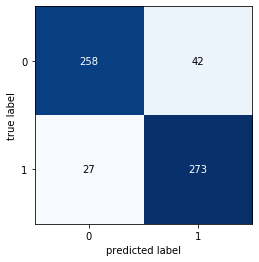

In [253]:
cf_svc_pca=confusion_matrix(y_test, y_pred_svc_pca)
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_pca)

In [254]:
############## Feature Engineering ################
svc_eng = SVC(C=10,kernel='rbf',gamma='scale')
svc_eng.fit(X=X_train_fe, y=y_train)
y_pred_svc_eng=svc_eng.predict(X_test_fe)
acc_svc_eng=accuracy_score(y_test, y_pred_svc_eng)
acc_svc_eng

0.7233333333333334

In [299]:
print('Support Vector Classifier with feature engineering ',acc_svc_eng)

Support Vector Classifier with feature engineering  0.7233333333333334


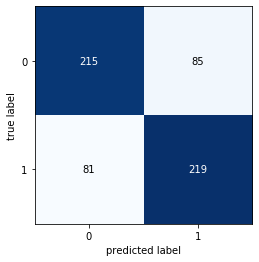

In [255]:
cf_svc_eng=confusion_matrix(y_test, y_pred_svc_eng)
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_eng)

In [266]:
############ SVC/SVM: Ends ######################

In [267]:
############ K Nearest Neighbors: Starts ######################
################## Original Features #####################
from sklearn.neighbors import KNeighborsClassifier

nbrs_orig = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
nbrs_orig.fit(X_train, y_train)
y_pred_nbrs_orig = nbrs_orig.predict(X_test)
acc_nbrs_orig=accuracy_score(y_test, y_pred_nbrs_orig)
acc_nbrs_orig

0.755

In [301]:
print('K Nearest Neighbors with original dataset ',acc_nbrs_orig)

K Nearest Neighbors with original dataset  0.755


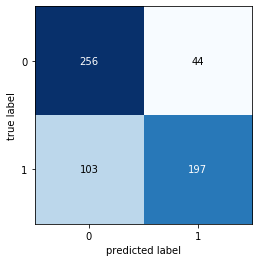

In [268]:
cf_svc_nbrs_orig=confusion_matrix(y_test, y_pred_nbrs_orig)
fig, ax = plot_confusion_matrix(conf_mat=cf_svc_nbrs_orig)

In [269]:
################## Selected Features #####################
nbrs_sel = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
nbrs_sel.fit(X_train_sp, y_train)
y_pred_nbrs_sel = nbrs_sel.predict(X_test_sp)
acc_nbrs_sel=accuracy_score(y_test, y_pred_nbrs_sel)
acc_nbrs_sel

0.7433333333333333

In [303]:
print('K Nearest Neighbors with feature selection ',acc_nbrs_sel)

K Nearest Neighbors with feature selection  0.7433333333333333


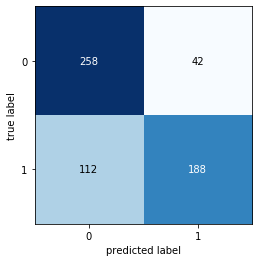

In [270]:
cf_nbrs_sel=confusion_matrix(y_test, y_pred_nbrs_sel)
fig, ax = plot_confusion_matrix(conf_mat=cf_nbrs_sel)

In [271]:
################## PCA Features #####################
nbrs_pca = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
nbrs_pca.fit(X_train_pca, y_train)
y_pred_nbrs_pca = nbrs_pca.predict(X_test_pca)
acc_nbrs_pca=accuracy_score(y_test, y_pred_nbrs_pca)
acc_nbrs_pca

0.8766666666666667

In [304]:
print('K Nearest Neighbors PCA features ',acc_nbrs_pca)

K Nearest Neighbors PCA features  0.8766666666666667


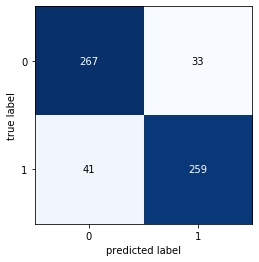

In [272]:
cf_nbrs_pca=confusion_matrix(y_test, y_pred_nbrs_pca)
fig, ax = plot_confusion_matrix(conf_mat=cf_nbrs_pca)

In [273]:
################## Engineered Features #####################
nbrs_eng = KNeighborsClassifier(n_neighbors=20, algorithm='auto')
nbrs_eng.fit(X_train_fe, y_train)
y_pred_nbrs_eng = nbrs_eng.predict(X_test_fe)
acc_nbrs_eng=accuracy_score(y_test, y_pred_nbrs_eng)
acc_nbrs_eng

0.775

In [305]:
print('K Nearest Neighbors with feature engineering ',acc_nbrs_eng)

K Nearest Neighbors with feature engineering  0.775


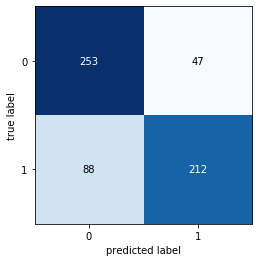

In [274]:
cf_nbrs_eng=confusion_matrix(y_test, y_pred_nbrs_eng)
fig, ax = plot_confusion_matrix(conf_mat=cf_nbrs_eng)
############ K Nearest Neighbors: Ends ######################

Task 4: Model building & evaluation. Train at least 4 models:

K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works.

### Answer 3 ###

K-nearest neighbors

It is a simple way to classify data. We start with train data which comprise of X_train (input data) and y_train (output data), i.e. the bins or the categories of the output. We cluster the data according to the categories. We then take a datapoint from the testing data point and try to classify it. We take a datapoint and try to figure out to which category it is most similar to and label it as belonging to that type of class. We do this by looking at the nearest datapoints, also known as nearest neighbours. This can be visualized by drawing a circle, and gradually increasing its radius to get the k nearest neighbors.

If, the K in K Nearest Neighbors is equal to 1, then we are using just the nearest neighbour to classify that datapoint. It will belong to the class of that neighbour. If, the K in K Nearest Neighbors is equal to 100, and there is more than 1 category of the nearest neighbors, then we simply pick the category that gets the most votes (the most number of times appearing class).


In [311]:
print('Logistic Regression Baseline Score with Original Dataset ', round(score*100, 2))
print('Logistic Regression with feature selection ', round(score_sel *100, 2))
print('Logistic Regression with feature engineering ', round(score_eng*100, 2))
print('Logistic Regression with PCA features ', round(score_pca *100, 2))

print('\n')
print('Neural Network Original Dataset ',round(acc_nn_orig*100, 2))
print('Neural Network with Selected Features ',round(acc_nn_sel*100, 2))
print('Neural Network with PCA features ',round(acc_nn_pca*100, 2))
print('Neural Network with feature engineering ',round(acc_nn_eng*100, 2))

print('\n')
print('Decision Tree with original dataset ',round(acc_dt_orig*100, 2))
print('Decision Tree with feature selection ',round(acc_dt_sel*100, 2))
print('Decision Tree with PCA features ',round(acc_dt_pca*100, 2))
print('Decision Tree with feature engineering ',round(acc_dt_eng*100, 2))

print('\n')
print('Random Forest with original dataset ',round(acc_rf_orig*100, 2))
print('Random Forest with feature selection ',round(acc_rf_sel*100, 2))
print('Random Forest with PCA features ',round(acc_rf_pca*100, 2))
print('Random Forest with feature engineering ',round(acc_rf_eng*100, 2))

print('\n')
print('Support Vector Classifier with original dataset ',round(acc_svc_orig*100, 2))
print('Support Vector Classifier with feature selection ',round(acc_svc_sel*100, 2))
print('Support Vector Classifier with PCA features ',round(acc_svc_pca*100, 2))
print('Support Vector Classifier with feature engineering ',round(acc_svc_eng*100, 2))

print('\n')
print('K Nearest Neighbors with original dataset ',round(acc_nbrs_orig*100, 2))
print('K Nearest Neighbors with feature selection ',round(acc_nbrs_sel*100, 2))
print('K Nearest Neighbors PCA features ',round(acc_nbrs_pca*100, 2))
print('K Nearest Neighbors with feature engineering ',round(acc_nbrs_eng*100, 2))


Logistic Regression Baseline Score with Original Dataset  59.17
Logistic Regression with feature selection  58.5
Logistic Regression with feature engineering  58.67
Logistic Regression with PCA features  59.33


Neural Network Original Dataset  60.17
Neural Network with Selected Features  63.67
Neural Network with PCA features  74.33
Neural Network with feature engineering  57.83


Decision Tree with original dataset  80.5
Decision Tree with feature selection  77.83
Decision Tree with PCA features  80.5
Decision Tree with feature engineering  80.0


Random Forest with original dataset  73.33
Random Forest with feature selection  74.33
Random Forest with PCA features  88.33
Random Forest with feature engineering  73.5


Support Vector Classifier with original dataset  64.67
Support Vector Classifier with feature selection  69.67
Support Vector Classifier with PCA features  88.5
Support Vector Classifier with feature engineering  72.33


K Nearest Neighbors with original dataset  75.5
K 

In [3]:
# Syntax and KNN referred from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://www.youtube.com/watch?v=HVXime0nQeI&t=207s

In [256]:
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100]}]

# clf_svc_sel_g = GridSearchCV(SVC(C=1), tuned_parameters,n_jobs=-1, cv=5,
#                        scoring='f1_macro')
# clf_svc_sel_g.fit(X=X_train_sp, y=y_train)

# y_pred_svc_sel_g=clf_svc_sel_g.predict(X_test_sp)
# acc_svc_sel_g=accuracy_score(y_test, y_pred_svc_sel_g)
# acc_svc_sel_g




# class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', 
#                       coef0=0.0, shrinking=True, probability=False, tol=0.001, 
#                       cache_size=200, class_weight=None, verbose=False, 
#                       max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [257]:
############ Original Features and RandomizedSearchCV ######################
# tuned_parameters = {'kernel': ['rbf','poly'],'gamma': [1e-3, 1e-4,'auto'], 'C': [1, 10, 100]}

# clf = SVC(gamma='auto')


# clf_svc_orig =RandomizedSearchCV(clf, param_distributions=tuned_parameters,
#                                    n_iter=10, cv=5, iid=False, random_state=5)
# clf_svc_orig.fit(X=X_train, y=y_train)

In [258]:
# y_pred_svc_orig=clf_svc_orig.predict(X_test)
# acc_svc_orig=accuracy_score(y_test, y_pred_svc_orig)
# acc_svc_orig

In [259]:
# cf_svc_orig=confusion_matrix(y_test, y_pred_svc_orig)
# fig, ax = plot_confusion_matrix(conf_mat=cf_svc_orig)

In [260]:
############ Selected Features and RandomizedSearchCV ######################
# tuned_parameters = {'kernel': ['rbf','poly'],'gamma': [1e-3, 1e-4,'auto'], 'C': [1, 10, 100]}

# clf = SVC(gamma='auto')


# clf_svc_sel =RandomizedSearchCV(clf, param_distributions=tuned_parameters,
#                                    n_iter=10, cv=5, iid=False, random_state=5)
# clf_svc_sel.fit(X=X_train_sp, y=y_train)

# y_pred_svc_sel=clf_svc_sel.predict(X_test_sp)
# acc_svc_sel=accuracy_score(y_test, y_pred_svc_sel)
# acc_svc_sel

In [261]:
# cf_svc_sel=confusion_matrix(y_test, y_pred_svc_sel)
# fig, ax = plot_confusion_matrix(conf_mat=cf_svc_sel)

In [262]:
############ PCA Features and RandomizedSearchCV ######################
# tuned_parameters = {'kernel': ['rbf','poly'],'gamma': [1e-3, 1e-4,'auto'], 'C': [1, 10, 100]}

# clf = SVC(gamma='auto')


# clf_svc_pca =RandomizedSearchCV(clf, param_distributions=tuned_parameters,
#                                    n_iter=10, cv=5, iid=False, random_state=5)
# clf_svc_pca.fit(X=X_train_pca, y=y_train)

# y_pred_svc_pca=clf_svc_pca.predict(X_test_pca)
# acc_svc_pca=accuracy_score(y_test, y_pred_svc_pca)
# acc_svc_pca

In [263]:
# cf_svc_pca=confusion_matrix(y_test, y_pred_svc_pca)
# fig, ax = plot_confusion_matrix(conf_mat=cf_svc_pca)

In [264]:
############ Engineered Features and RandomizedSearchCV ######################
# tuned_parameters = {'kernel': ['rbf','poly'],'gamma': [1e-3, 1e-4,'auto'], 'C': [1, 10, 100]}

# clf = SVC(gamma='auto')


# clf_svc_eng =RandomizedSearchCV(clf, param_distributions=tuned_parameters,
#                                    n_iter=10, cv=5, iid=False, random_state=5)
# clf_svc_eng.fit(X=X_train_fe, y=y_train)

# y_pred_svc_eng=clf_svc_eng.predict(X_test_fe)
# acc_svc_eng=accuracy_score(y_test, y_pred_svc_eng)
# acc_svc_eng

In [265]:
# cf_svc_eng=confusion_matrix(y_test, y_pred_svc_eng)
# fig, ax = plot_confusion_matrix(conf_mat=cf_svc_eng)